__<span style="background-color:#ffffe0">第3章　時系列予測モデル構築・超入門</span>__

# 3.4　季節成分が複数ある場合の予測モデル

## 3.4.2　TBATSで構築する予測モデル

### 準備（必要なモジュールとデータの読み込み）

In [1]:
#
# 必要なモジュールの読み込み
#

import numpy as np
import pandas as pd

import statsmodels.api as sm

from tbats import TBATS

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
plt.rcParams['font.size'] = 14 #フォントサイズ

In [2]:
#
# 必要なデータセット（時系列データ）の読み込み
#

dataset = sm.datasets.get_rdataset(
    "taylor", "forecast")

print(dataset.data) #確認

          x
0     22262
1     21756
2     22247
3     22759
4     22549
...     ...
4027  27946
4028  27133
4029  25996
4030  24610
4031  23132

[4032 rows x 1 columns]


In [3]:
#
# データセットを学習データとテストデータ（直近7日間=30分×336）に分割
#

# データ分割
train, test = train_test_split(
    dataset.data, test_size=336)

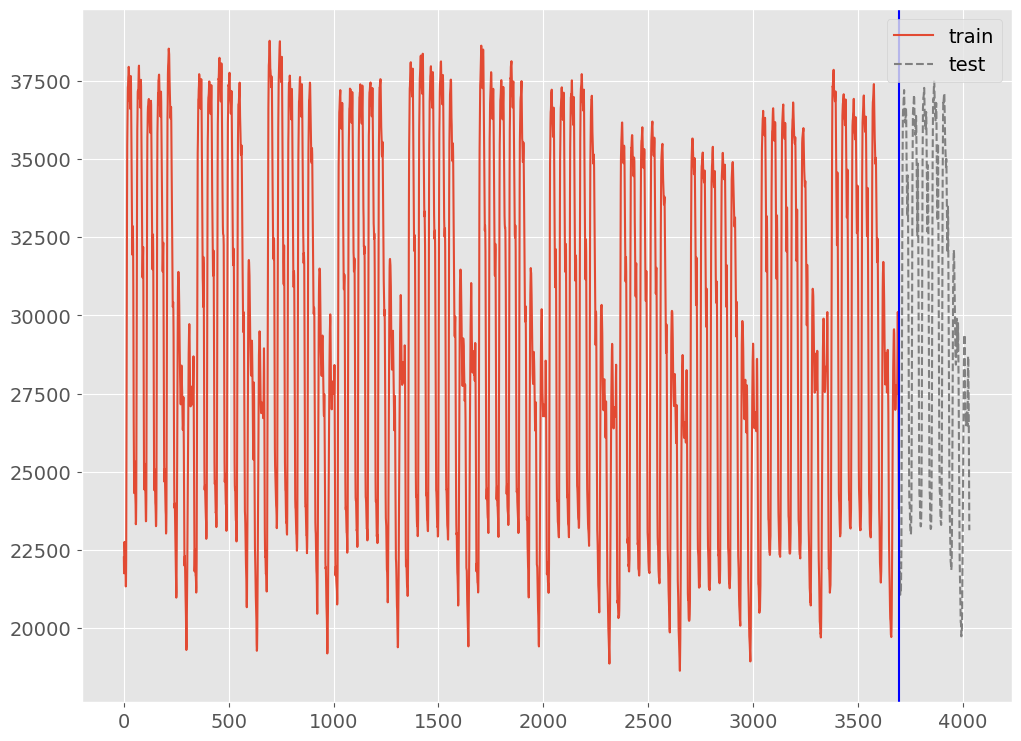

In [4]:
#
# グラフ（学習データとテストデータ）
#

fig, ax = plt.subplots()

# 学習データの描写
ax.plot(
    train.index, 
    train.values, 
    linestyle='-',
    label='train')

# テストデータの描写
ax.plot(
    test.index, 
    test.values, 
    linestyle='--',
    label='test', 
    color='gray')

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    len(train),
    color='blue')

# 凡例表示
ax.legend()

plt.show()

### 予測モデルの学習（学習データ利用）

In [5]:
#
# 予測モデルの学習（学習データ利用）
#

# モデルのインスタンス生成
model = TBATS(seasonal_periods=(48, 336))

# 学習
fitted_model = model.fit(train)

### 予測モデルのテスト（テストデータ利用）

In [6]:
#
# 予測の実施
#

# 学習データ期間の予測値
train_pred = fitted_model.y_hat

# テストデータ期間の予測値
test_pred = fitted_model.forecast(steps=336)

In [7]:
#
# 予測モデルのテスト（テストデータ利用）
#

print('RMSE:\n',
      np.sqrt(mean_squared_error(
          test.x, test_pred)))
print('MAE:\n',
      mean_absolute_error(
          test.x, test_pred)) 
print('MAPE:\n',
      mean_absolute_percentage_error(
          test, test_pred))

RMSE:
 1351.3373237734304
MAE:
 1128.047973495191
MAPE:
 0.03982684861523146


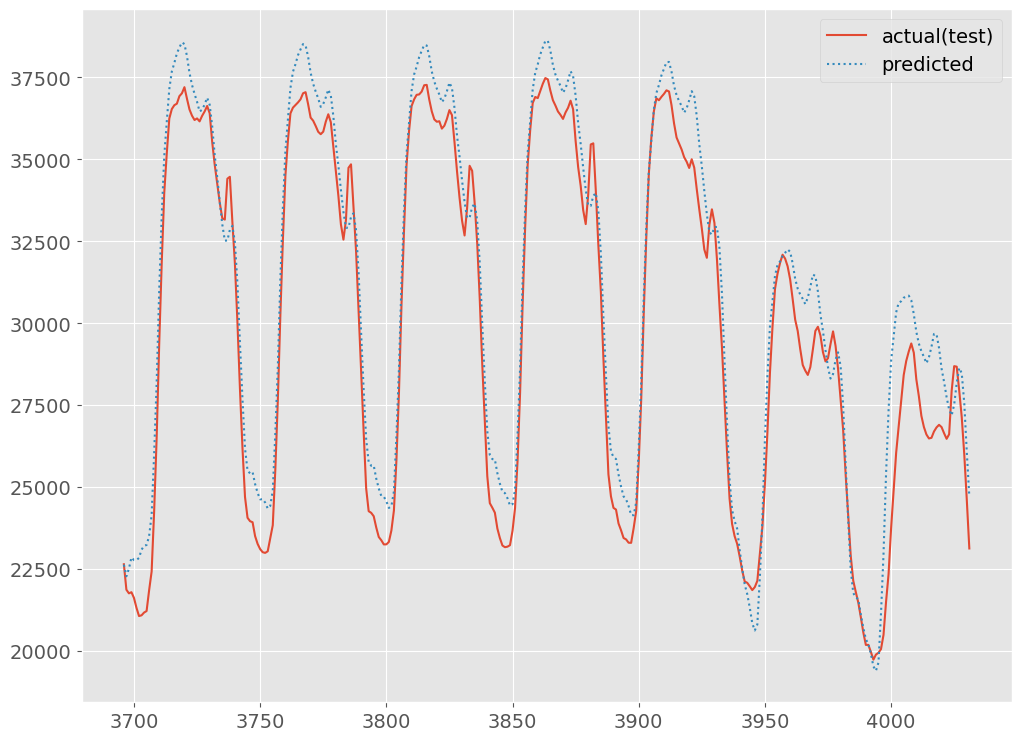

In [8]:
#
# グラフ（予測値と実測値）
#

fig, ax = plt.subplots()

# 実測値
ax.plot(
    test.index, 
    test.x, 
    linestyle='-',
    label='actual(test)')

# 予測値
ax.plot(
    test.index, 
    test_pred, 
    linestyle=':',
    label="predicted") 

# 凡例表示
ax.legend()

plt.show()

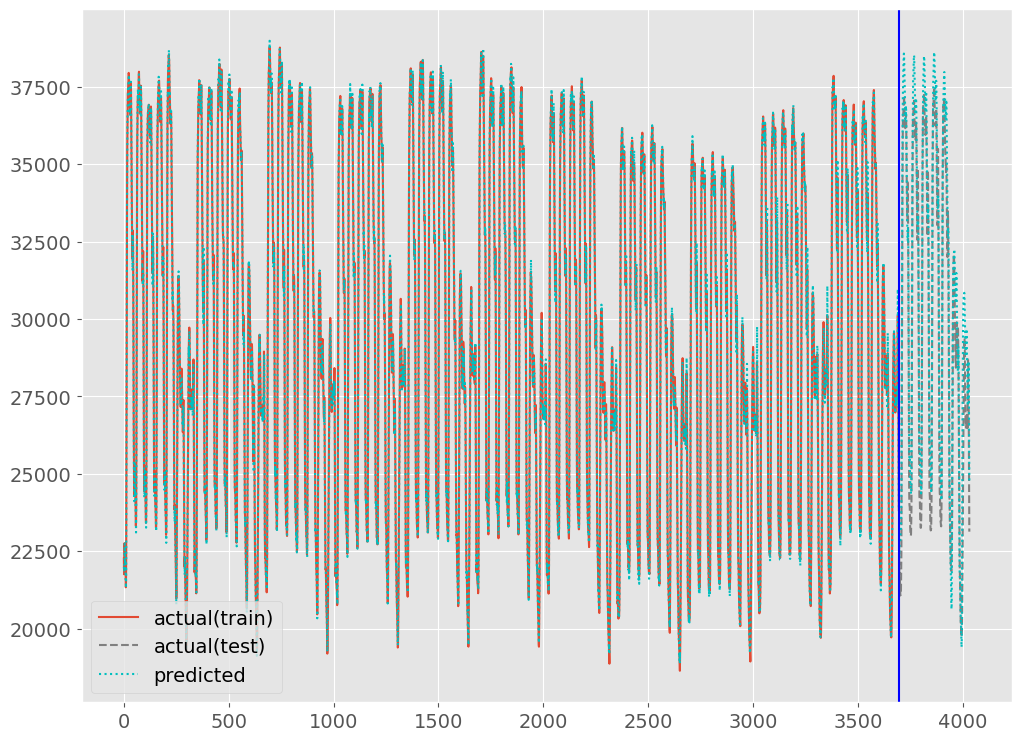

In [9]:
#
# グラフ（予測値と実測値）
#

fig, ax = plt.subplots()

# 実測値の描写
## 学習データ
ax.plot(
    train.index,
    train.x,
    linestyle='-',
    label='actual(train)')

## テストデータ
ax.plot(
    test.index,
    test.x, 
    linestyle='--',
    label='actual(test)',
    color='gray')

# 予測値の描写
## 学習データ
ax.plot(
    train.index,
    train_pred, 
    linestyle=':',
    color='c')

## テストデータ
ax.plot(
    test.index, 
    test_pred,
    linestyle=':',
    label="predicted", 
    color='c') 

# 学習データとテスデータの間の縦線の描写
ax.axvline(
    len(train),
    color='blue')

# 凡例表示
ax.legend()

plt.show()